In [1]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities, _kl_divergence)
from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib import animation, rc
%matplotlib inline
rc('animation', html='html5')

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

import Utils.MatrixPlot as mp
import Utils.BuildMatrix as bm

In [2]:
digits = load_digits()

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.images.shape

(1797, 8, 8)

In [5]:
digits.data[1,...]

array([  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
        11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
         0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
         0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
        16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
         0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.])

In [6]:
digits.images[1,...]

array([[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
       [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
       [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
       [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
       [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
       [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
       [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
       [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]])

In [7]:
onesData = digits.data[digits.target==1]
onesImages = digits.images[digits.target==1]
len(onesData), len(onesImages)

(182, 182)

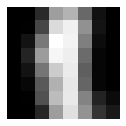

In [8]:
ia1 = np.average(onesImages, axis=0)
plt.figure(figsize=(2,2))
plt.gray()
ax = plt.subplot()
ax.matshow(ia1)
plt.xticks([]); plt.yticks([])
plt.show()

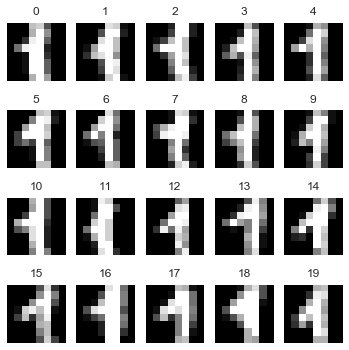

In [9]:
nrows, ncols = 4, 5
plt.figure(figsize=(6,6))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(onesImages[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(i)

In [10]:
twosData = digits.data[digits.target==2]
twosImages = digits.images[digits.target==2]
len(twosData), len(twosImages)

(177, 177)

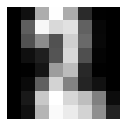

In [11]:
ia2 = np.average(twosImages, axis=0)
plt.figure(figsize=(2,2))
plt.gray()
ax = plt.subplot()
ax.matshow(ia2)
plt.xticks([]); plt.yticks([])
plt.show()

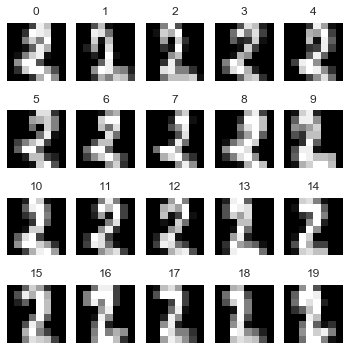

In [12]:
nrows, ncols = 4, 5
plt.figure(figsize=(6,6))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(twosImages[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(i)

In [13]:
def CapSpec(data, cap_ct):
    u, s, v = np.linalg.svd(data[:cap_ct])
    return np.log10(s)

In [14]:
def CapSig(data, cap_ct):
    u, s, v = np.linalg.svd(data[:cap_ct])
    return np.sum(np.log10(s))

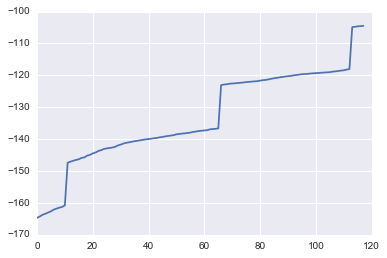

In [15]:
capSpec1 = [CapSig(onesData, i) for i in range(64,len(onesData))]
plt.plot(capSpec1)
plt.show()

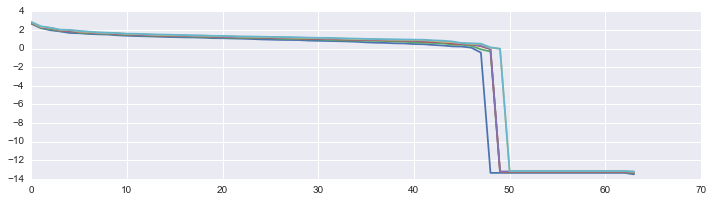

In [22]:
plt.figure(figsize=(12,3))
for i in range(64,len(onesData), 20):
    plt.plot(CapSpec(onesData, i))
plt.show()

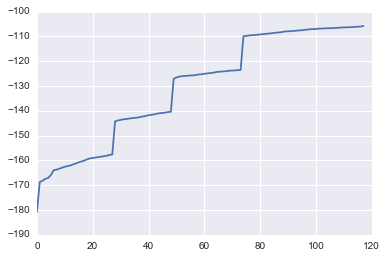

In [15]:
# sort on column 3
sod = onesData[onesData[:,3].argsort()]
sod1 = [CapSig(sod, i) for i in range(64,len(sod))]
plt.plot(sod1)
plt.show()

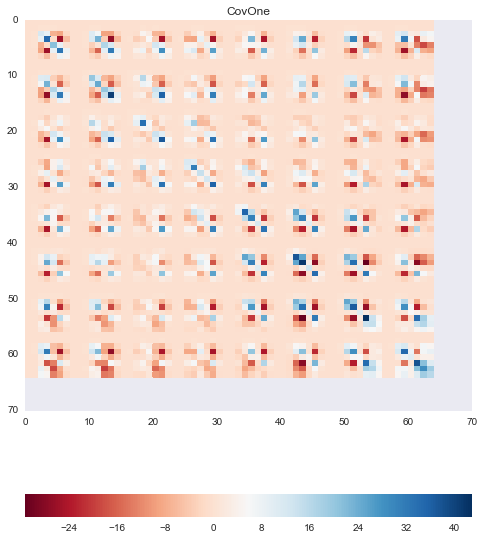

In [16]:
covOne = np.cov(onesData.T)
covTwo = np.cov(twosData.T)
mp.plotOneMatrix(covOne.tolist(), "CovOne", width=8, height=10)

In [23]:
linalg.det(covOne), linalg.det(covTwo)

(0.0, 0.0)

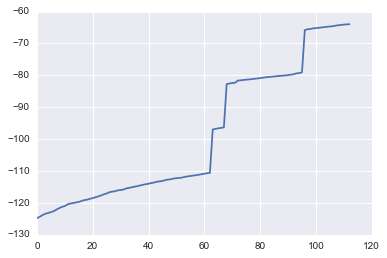

In [24]:
capSpec2 = [CapSig(twosData, i) for i in range(64,len(twosData))]
plt.plot(capSpec2)
plt.show()

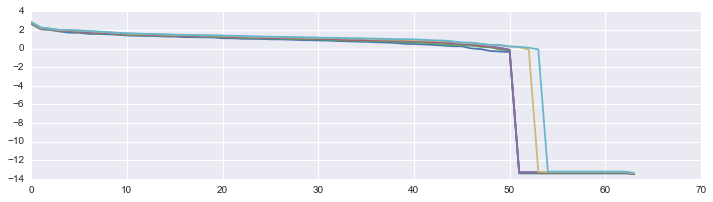

In [27]:
plt.figure(figsize=(12,3))
for i in range(64,len(twosData), 20):
    plt.plot(CapSpec(twosData, i))
plt.show()

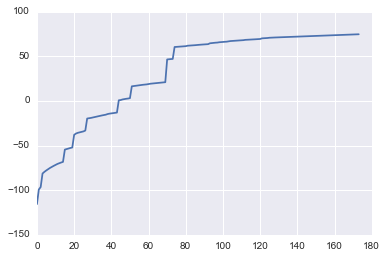

In [25]:
capSpecD = [CapSig(digits.data, i) for i in range(64,len(digits.data), 10)]
plt.plot(capSpecD)
plt.show()

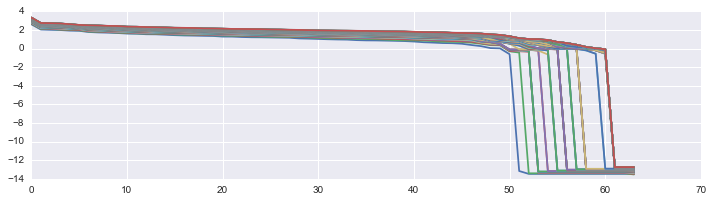

In [28]:
plt.figure(figsize=(12,3))
for i in range(64,len(digits.data), 20):
    plt.plot(CapSpec(digits.data, i))
plt.show()

In [30]:
cov = bm.randnPdefMatrix(rows=64, cols=64, seed=6123) 
center = np.array([0] * 64)
rpdvs = np.array([v / linalg.norm(v) for v in np.random.multivariate_normal(center, cov, 20000)])

In [32]:
rpdvsCov = np.cov(rpdvs.T)
#mp.plotOneMatrix(rpdvsCov.tolist(), "rpdvsCov", width=8, height=10)

In [33]:
linalg.det(cov), linalg.det(rpdvsCov)

(7.7716826160872928e+86, 4.7455247568681549e-144)

In [ ]:
rpdvsSpec = [CapSig(rpdvs, i) for i in range(64, len(rpdvs), 1000)]
plt.plot(rpdvsSpec)
plt.show()

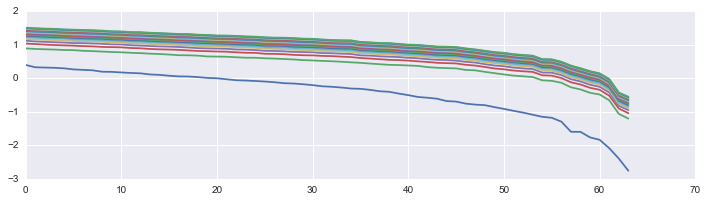

In [34]:
plt.figure(figsize=(12,3))
for i in range(64, len(rpdvs), 1000):
    plt.plot(CapSpec(rpdvs, i))
plt.show()